# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
# %matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [3]:
df.head(5).T

,0,1,2,3,4
dateCrawled,2016-03-24 11:52:17,2016-03-24 10:58:45,2016-03-14 12:52:21,2016-03-17 16:54:04,2016-03-31 17:25:20
name,Golf_3_1.6,A5_Sportback_2.7_Tdi,"Jeep_Grand_Cherokee_""Overland""",GOLF_4_1_4__3TÃRER,Skoda_Fabia_1.4_TDI_PD_Classic
seller,privat,privat,privat,privat,privat
offerType,Offer,Offer,Offer,Offer,Offer
price,480,18300,9800,1500,3600
abtest,test,test,test,test,test
vehicleType,Other,coupe,suv,kleinwagen,kleinwagen
yearOfRegistration,1993,2011,2004,2001,2008
gearbox,manuell,manuell,automatik,manuell,manuell
powerPS,0,190,163,75,69


In [4]:
media = df.groupby(['brand','vehicleType'])['price'].mean().astype(int)
media = pd.DataFrame(media)
media = media.reset_index(level='brand')
media = media.reset_index()
media = media[['price','brand','vehicleType']]
media = media.dropna()
media.head()
media = media.pivot('brand','vehicleType','price')
media

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669.0,962.0,NaN,7035.0,5265.0,1867.0,3312.0,2600.0,0.0
audi,1012.0,2685.0,3485.0,9655.0,11242.0,2582.0,5442.0,3829.0,18644.0
bmw,896.0,1720.0,4064.0,8613.0,6375.0,1575.0,5030.0,4838.0,12868.0
chevrolet,1250.0,3059.0,5188.0,10590.0,9991.0,2588.0,4143.0,4944.0,9613.0
chrysler,915.0,2919.0,2395.0,4160.0,8194.0,1666.0,3930.0,3191.0,5888.0
citroen,912.0,2248.0,4036.0,4536.0,2695.0,2274.0,3101.0,3379.0,10810.0
dacia,1674.0,3560.0,8370.0,NaN,NaN,3276.0,4166.0,3260.0,9761.0
daewoo,664.0,993.0,1262.0,900.0,428.0,1110.0,816.0,983.0,1900.0
daihatsu,614.0,1075.0,1201.0,7761.0,NaN,1402.0,3420.0,3329.0,2066.0


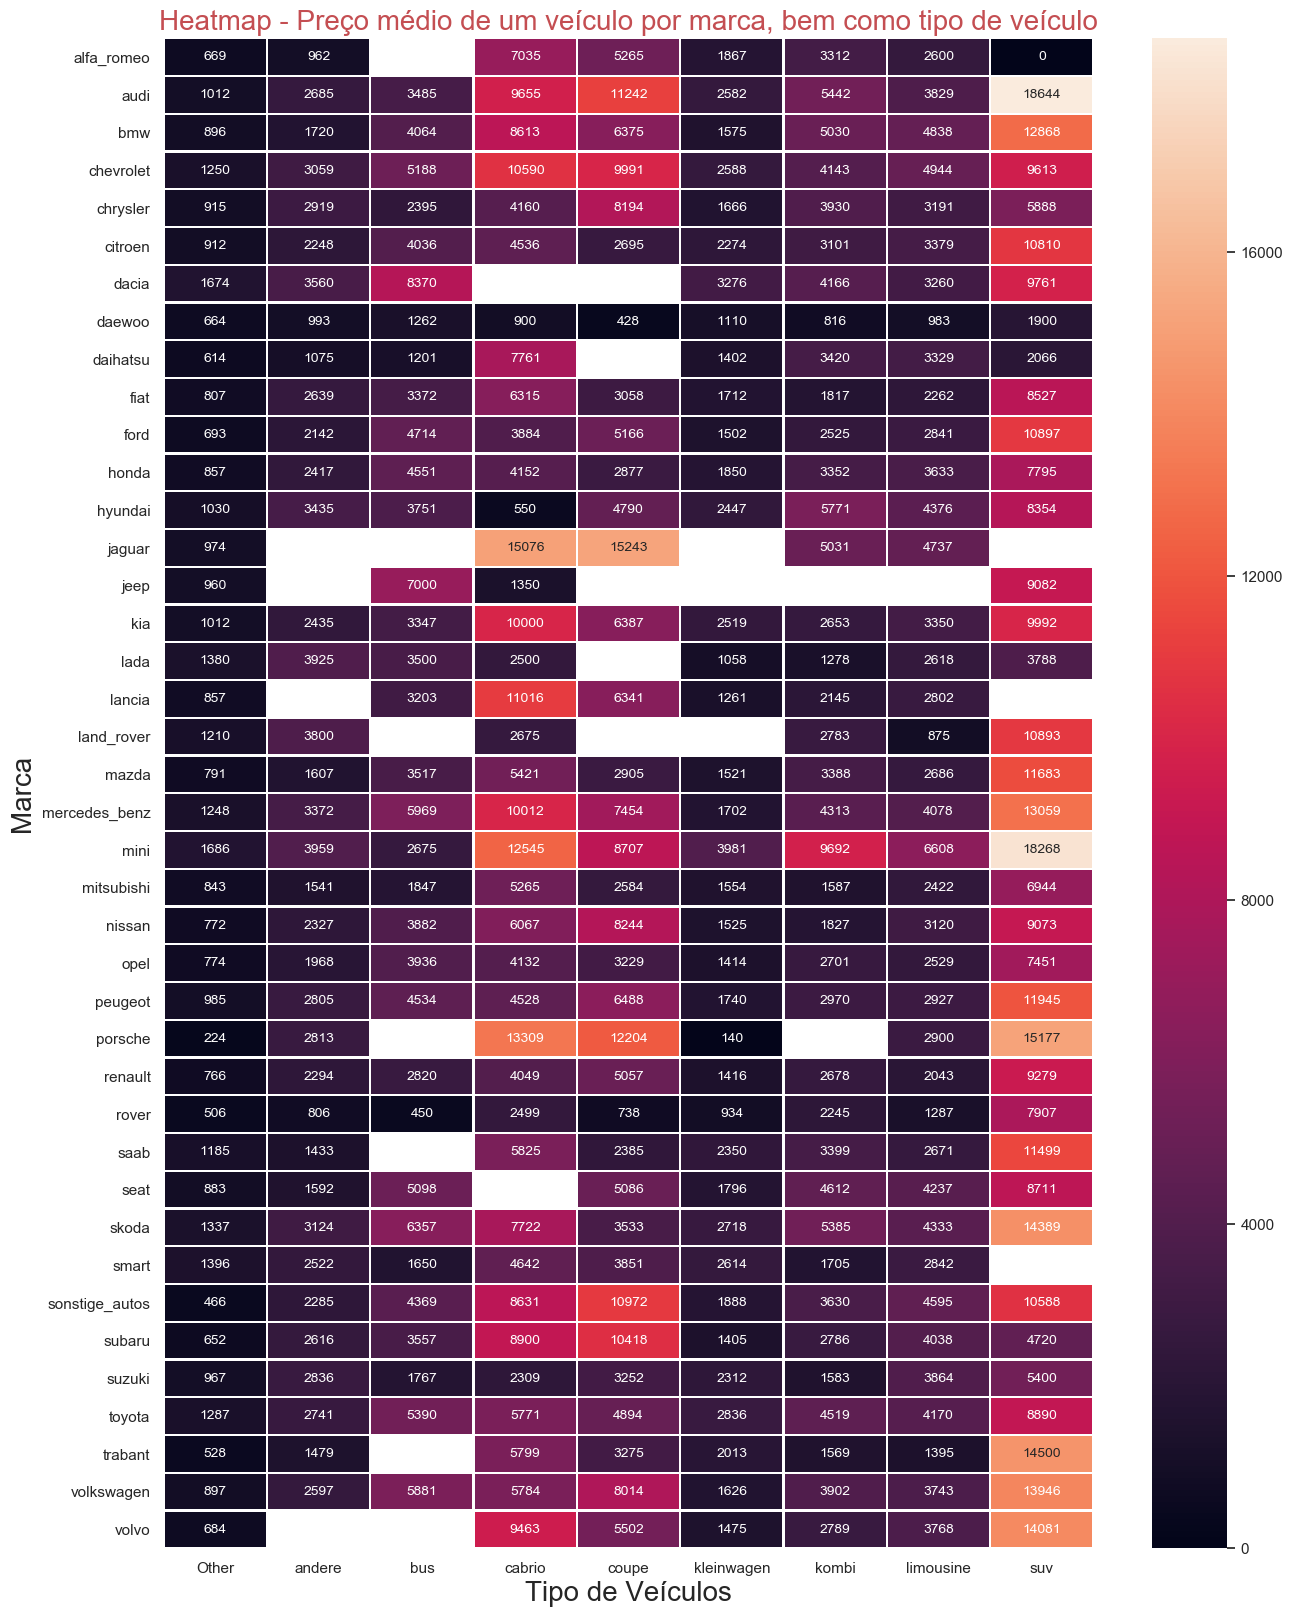

In [5]:
plt.figure(figsize=(15, 20), dpi=100)

fontsize = 20
titlesize = 20

fig_sns = sns.heatmap(media, linewidths=1, annot=True, fmt=".0f")
plt.xlabel('Tipo de Veículos', fontsize=fontsize)
plt.ylabel('Marca', fontsize=fontsize)
plt.title('Heatmap - Preço médio de um veículo por marca, bem como tipo de veículo', fontsize=titlesize, color='r')

plt.show()

In [6]:
# Calcule a média de preço por marca e por veículo
# Calcule a média de preço por marca e por veículo
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


In [7]:
tri = trial.pivot("brand","vehicleType", "avgPrice")

## Preço médio de um veículo por marca, bem como tipo de veículo

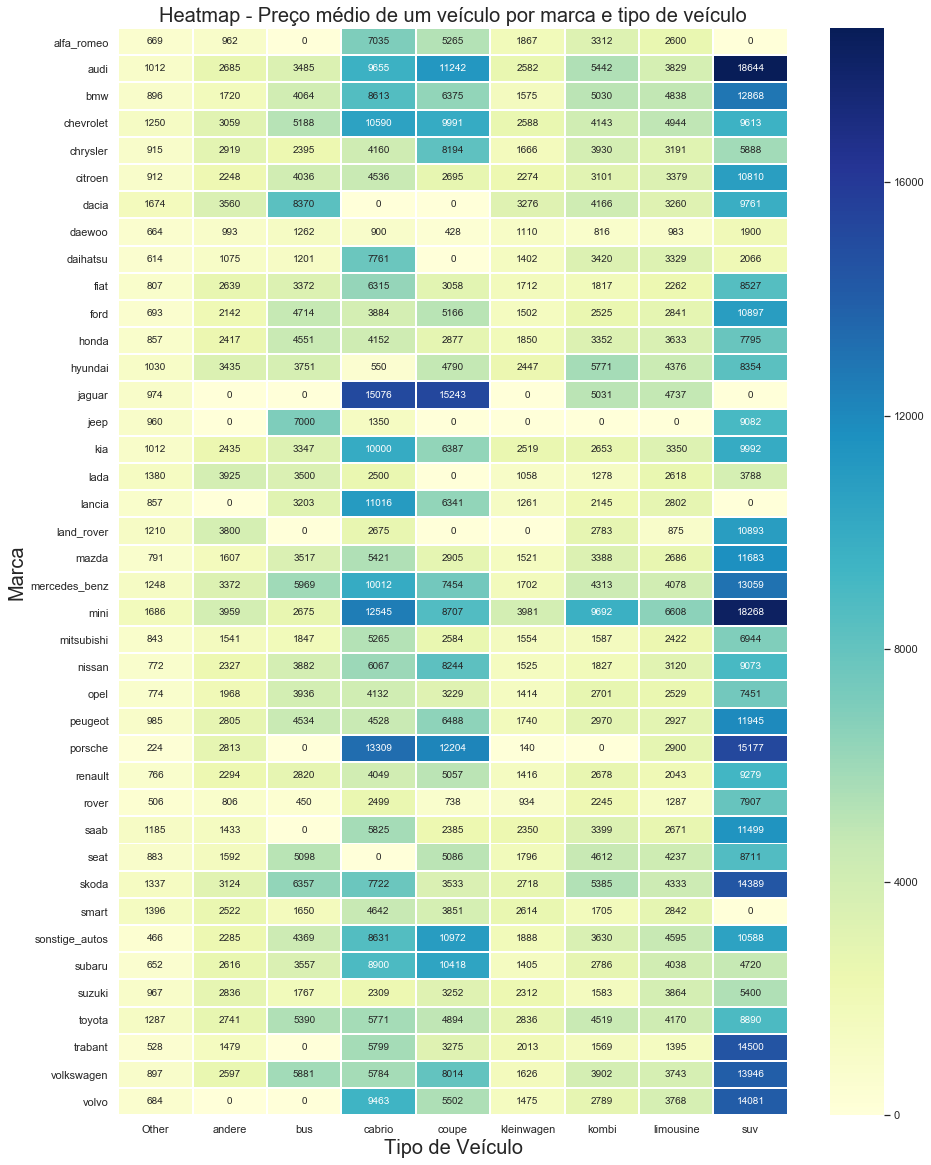

In [8]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()

In [10]:
# Salvando o plot
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")
fig = fig_sns.get_figure()
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType-my.png")

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>